<a href="https://colab.research.google.com/github/Zadkaiv/ML_projects.repo/blob/main/clusterizacion_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
datos = pd.read_csv('/content/U5_02_housing (1).csv')

In [29]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<Axes: xlabel='latitude', ylabel='longitude'>

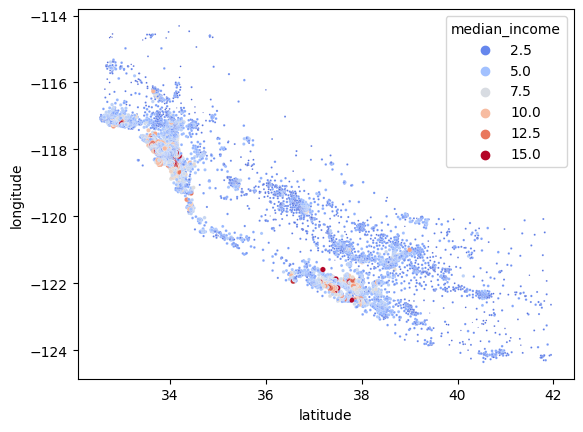

In [30]:
import seaborn as sb
sb.scatterplot(x='latitude', y='longitude', data=datos, hue='median_income',
               s=datos['median_income'], palette='coolwarm')

In [31]:
from sklearn.cluster import KMeans

X = datos.loc[:, ['latitude', 'longitude', 'median_income']]
modelo = KMeans(n_clusters=6)
predicciones= modelo.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
predicciones.shape

(20640,)

In [33]:
X['segmento_economico'] = predicciones

In [34]:
X['segmento_economico'].value_counts()

5    6997
3    4861
2    3854
1    2786
0    1683
4     459
Name: segmento_economico, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

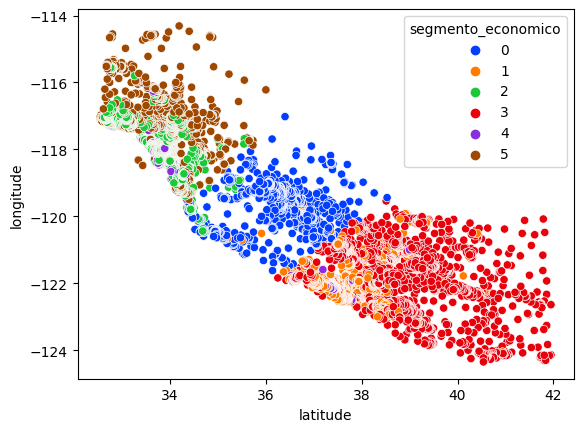

In [37]:
import seaborn as sb
sb.scatterplot(x='latitude', y='longitude', data=X, hue='segmento_economico',
               palette='bright')

<Axes: xlabel='segmento_economico', ylabel='count'>

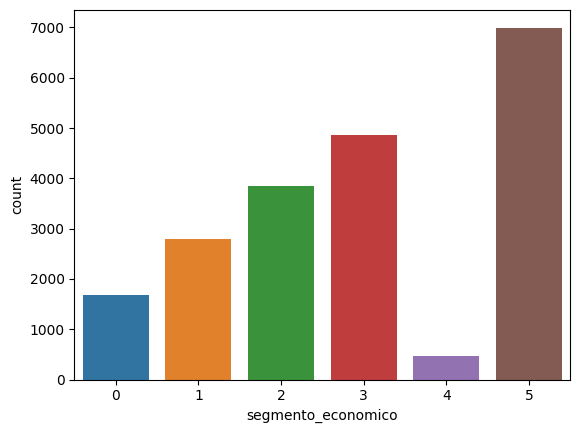

In [38]:
sb.countplot(x='segmento_economico', data=X)

In [40]:
X.groupby(['segmento_economico'])['median_income'].mean()

segmento_economico
0     2.669611
1     5.509181
2     5.511683
3     2.817809
4    10.946702
5     2.870542
Name: median_income, dtype: float64